<a href="https://colab.research.google.com/github/NandhiniBalasundar/DataScience/blob/main/Customer_Churn_Analysis_for_a_Subscription_Based_Service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Churn Analysis for a Subscription-Based Service**

A "Customer Churn Analysis for a Subscription-Based Service" project focuses on understanding and addressing customer churn within a subscription-based business model. Customer churn refers to the rate at which customers stop using or cancel their subscriptions to a particular service. This type of project is common in industries such as streaming services, software as a service (SaaS), telecom, and any other business that relies on recurring subscription revenue.

**Customer Churn Analysis for a Subscription-Based Service with python**

The dataset that I will be using here for the task of Customer Churn Analysis is taken from Kaggle- https://www.kaggle.com/datasets/blastchar/telco-customer-churn   



The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

Let’s start by importing the necessary Python libraries and the dataset:

In [2]:
import pandas as pd #imported the Pandas library in Python using the alias "pd."
import numpy as np #imported the NumPy library in Python using the alias "np."
import seaborn as sns #Seaborn library in Python using the alias "sns."
import matplotlib.pyplot as plt  #imported the Matplotlib library in Python and created an alias "plt."

In [5]:
#reading a CSV file named "WA_Fn-UseC_-Telco-Customer-Churn.csv" into a Pandas DataFrame named "df."

df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#displaying all rows of the datset
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
#displaying the first five rows of a Pandas DataFrame

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#displaying the last five rows of a Pandas DataFrame

df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
#randomly select and return a single random row from a DataFrame

df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3035,7924-GJZFI,Female,1,Yes,No,25,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.3,1813.1,No


In [9]:
#get the dimensions of a DataFrame

df.shape

(7043, 21)

In [10]:
#display the rows
df.shape[0]

7043

In [11]:
#display the columns
df.shape[1]

21

In [12]:
#display the datatype of column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
#getting all column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
#displaying all data about the columns
#non-null - missing value is there or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
#total missing value in column ways
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
#getting descriptive statistics of data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
#displaying the column which has unique data

df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**DATA PREPROCESSING / DATA CLEANING**

**Dummy Encoding**

The objective of this project is about find the rate at which customers or subscribers stop using or discontinue their relationship with a product or service.So converting non numerical to numerical only for the column Churn.

In [18]:
dummy=pd.get_dummies(data=df,columns=['SeniorCitizen','Contract','Churn'])
dummy

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,SeniorCitizen_0,SeniorCitizen_1,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn_No,Churn_Yes
0,7590-VHVEG,Female,Yes,No,1,No,No phone service,DSL,No,Yes,...,Electronic check,29.85,29.85,1,0,1,0,0,1,0
1,5575-GNVDE,Male,No,No,34,Yes,No,DSL,Yes,No,...,Mailed check,56.95,1889.5,1,0,0,1,0,1,0
2,3668-QPYBK,Male,No,No,2,Yes,No,DSL,Yes,Yes,...,Mailed check,53.85,108.15,1,0,1,0,0,0,1
3,7795-CFOCW,Male,No,No,45,No,No phone service,DSL,Yes,No,...,Bank transfer (automatic),42.30,1840.75,1,0,0,1,0,1,0
4,9237-HQITU,Female,No,No,2,Yes,No,Fiber optic,No,No,...,Electronic check,70.70,151.65,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Mailed check,84.80,1990.5,1,0,0,1,0,1,0
7039,2234-XADUH,Female,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Credit card (automatic),103.20,7362.9,1,0,0,1,0,1,0
7040,4801-JZAZL,Female,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Electronic check,29.60,346.45,1,0,1,0,0,1,0
7041,8361-LTMKD,Male,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,Mailed check,74.40,306.6,0,1,1,0,0,0,1


**Removing Duplicate Data**

Here Iam checking whether any duplicate datas are available.

In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [20]:
df.duplicated().sum()

0

**DATA VISUALIZATION**

I have used **countplot** for visualization

This barplot displaying the count of people subscribed and not subscribed.

0 is not subscribed and 1 is subscribed.

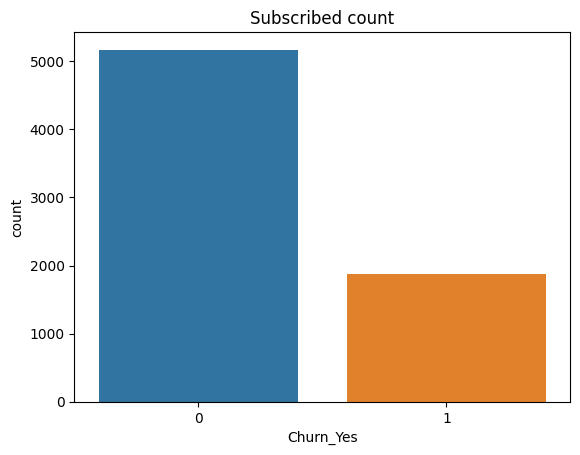

In [21]:
sns.countplot( x="Churn_Yes",data=dummy)
plt.title("Subscribed count")
plt.show()

This plot describe count of seniorcitizen

0 is not a seniorctizen and 1 is seniorcitizen

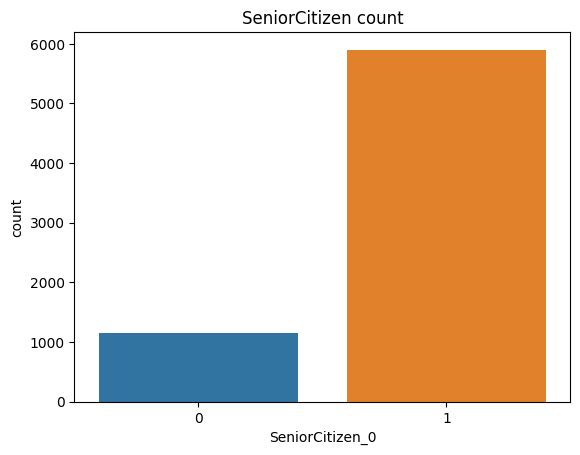

In [22]:
sns.countplot( x="SeniorCitizen_0",data=dummy)
plt.title("SeniorCitizen count")
plt.show()

This plot describe the number of seniorcitizen subscribed and not subscribed.


**0 is not a seniorcitizen.**
subscribed and not subscribed

**1 is seniorcitizen.**
subscribed and not subscribed

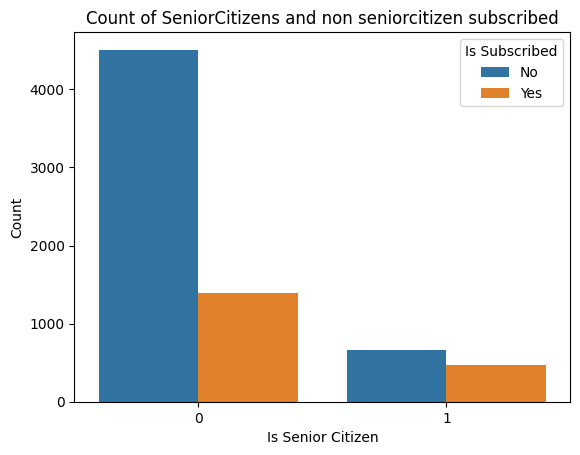

In [23]:
sns.countplot(x="SeniorCitizen_1", hue="Churn_Yes", data=dummy)

# Add labels and title
plt.xlabel("Is Senior Citizen")
plt.ylabel("Count")
plt.title("Count of SeniorCitizens and non seniorcitizen subscribed")

# Customize legend (optional)
plt.legend(title="Is Subscribed", labels=["No", "Yes"])

# Show the plot
plt.show()


This paiplot is for the whole dataset which has only numerical data.

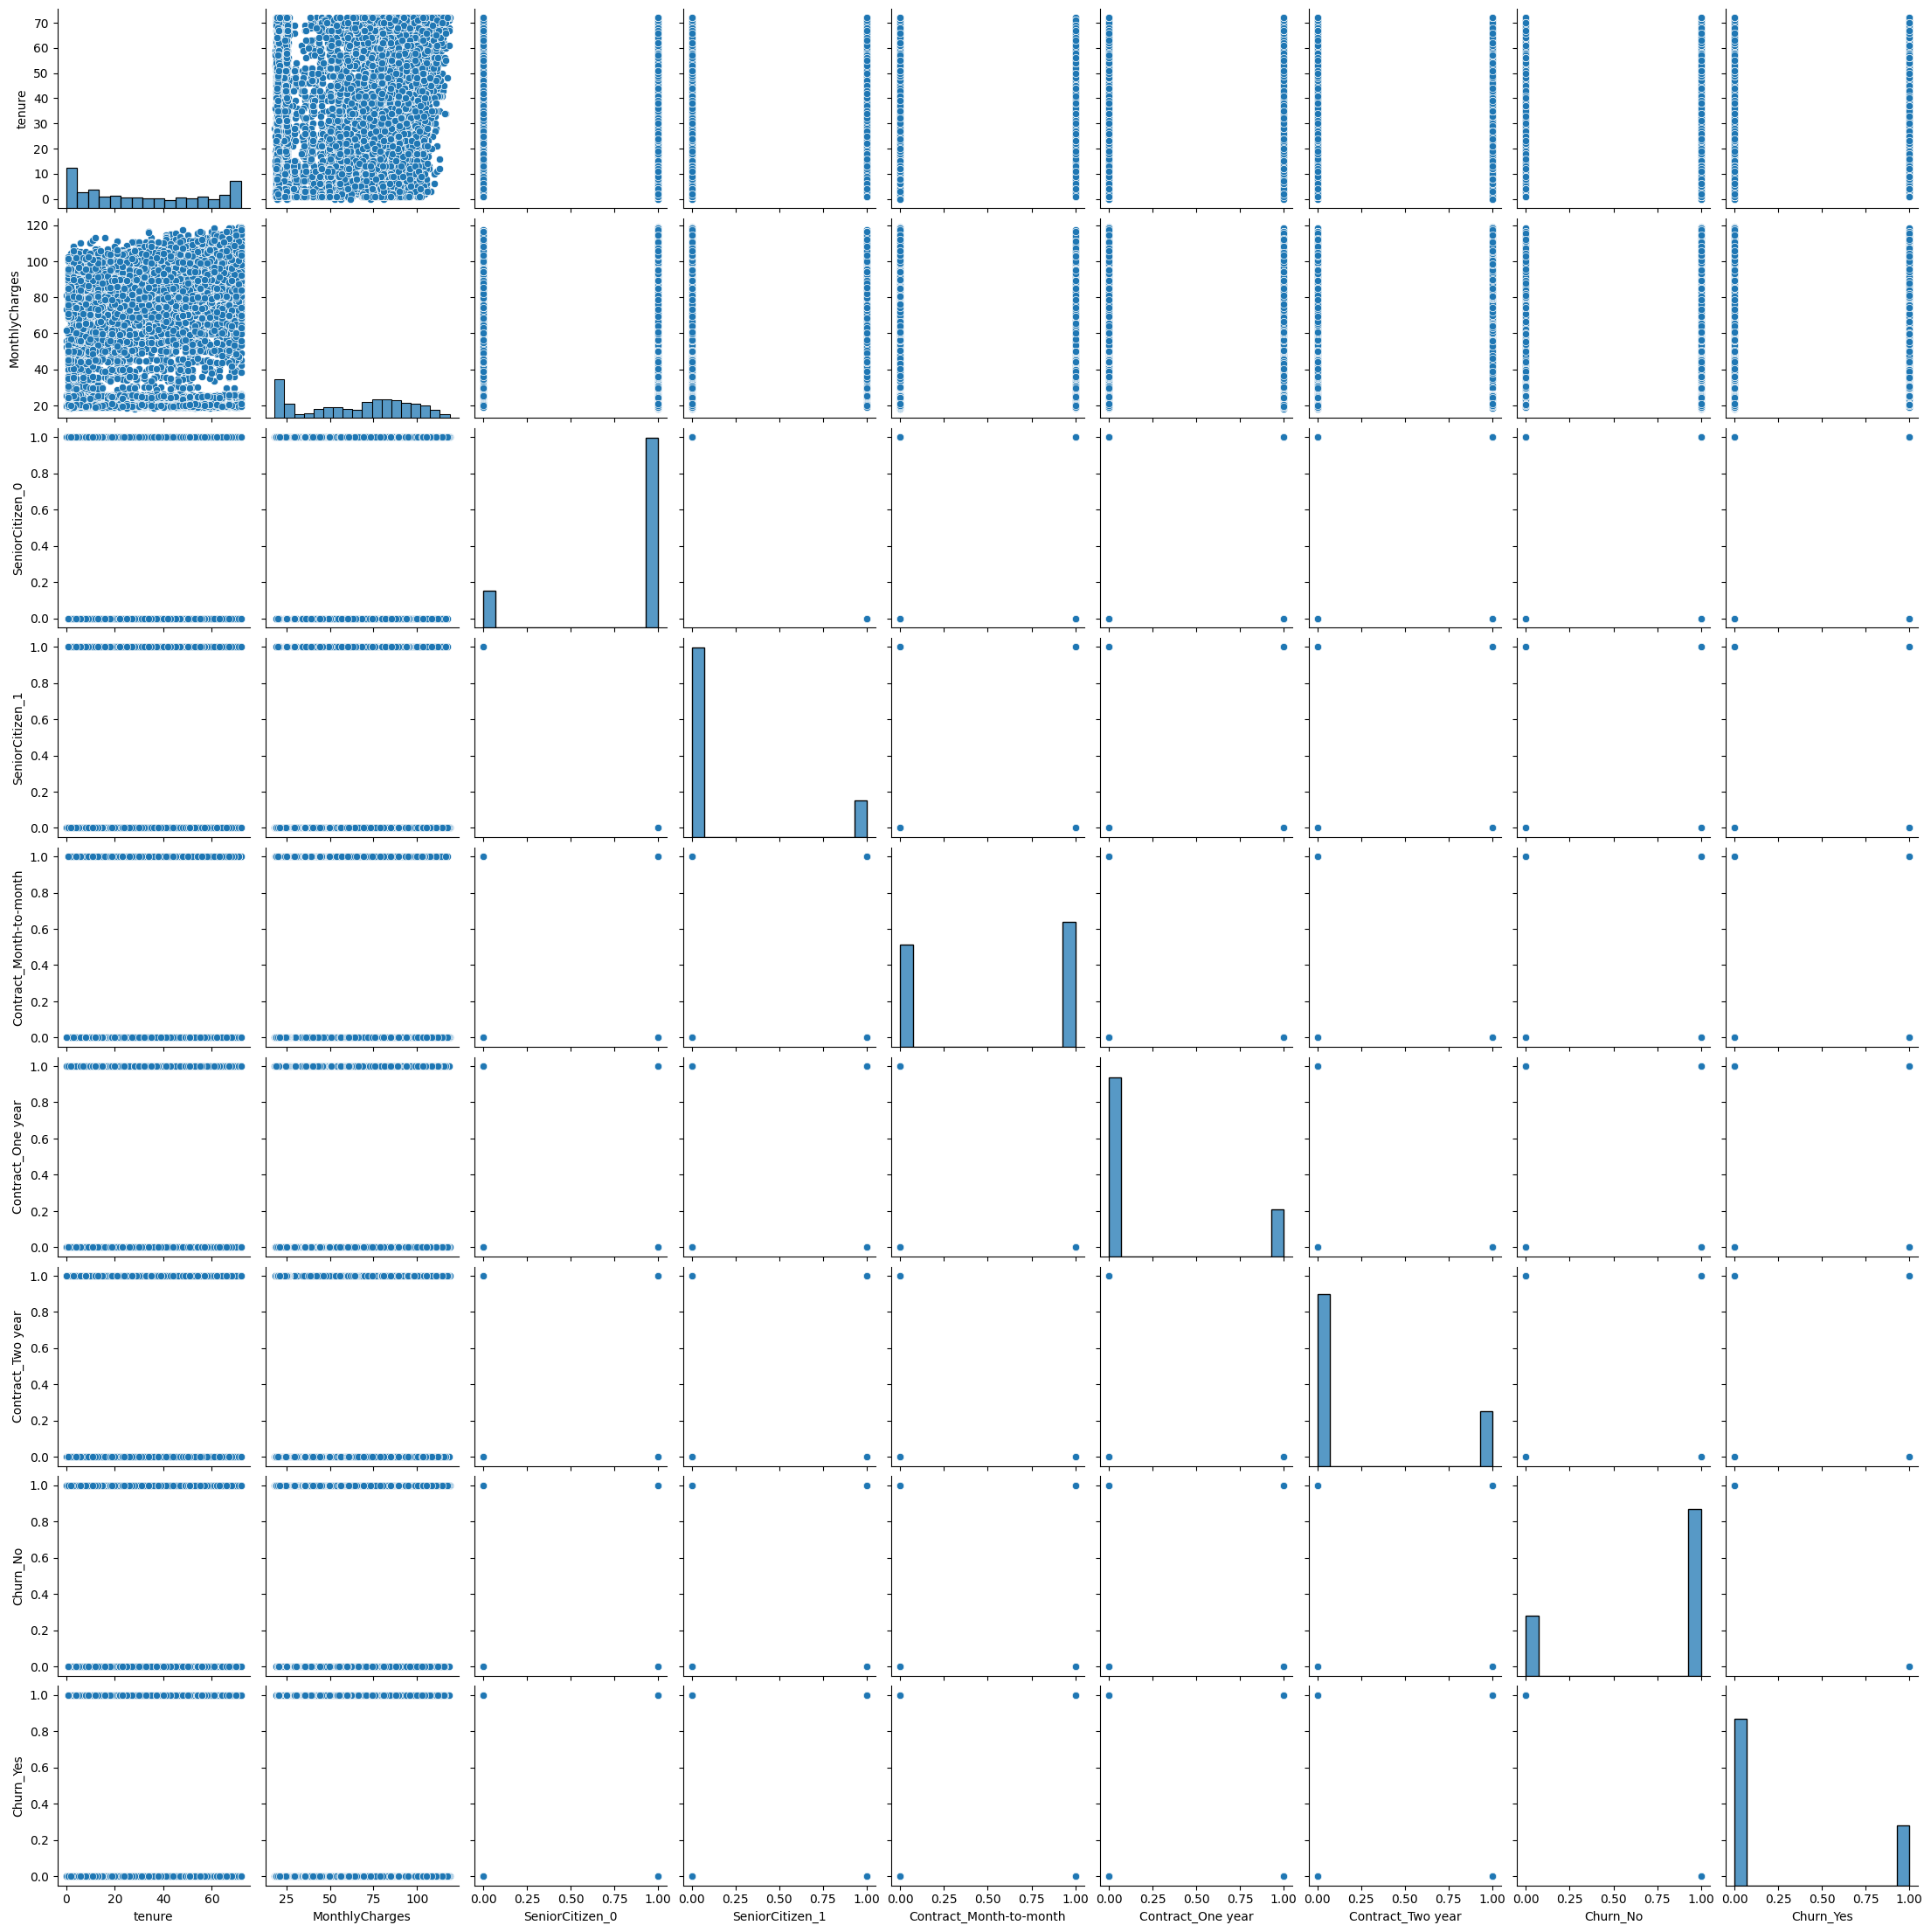

In [24]:
sns.pairplot(dummy)

pairplot only for Seniorcitizen who subscribed.

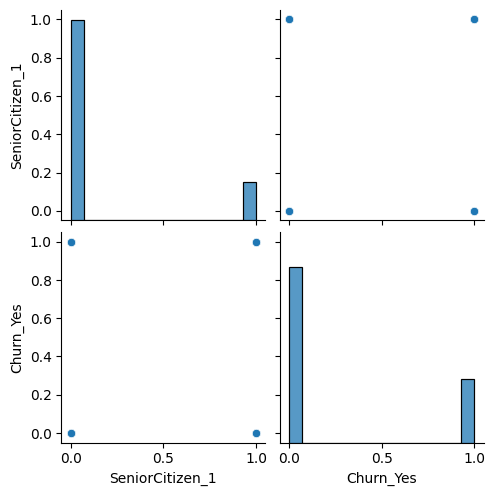

In [25]:
sns.pairplot(dummy,vars=['SeniorCitizen_1','Churn_Yes'])

Heatmap - Graphical representation of the datas.

each describes value of a data point.

<ipython-input-26-1b1dedd3517b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dummy.corr(),annot=True)


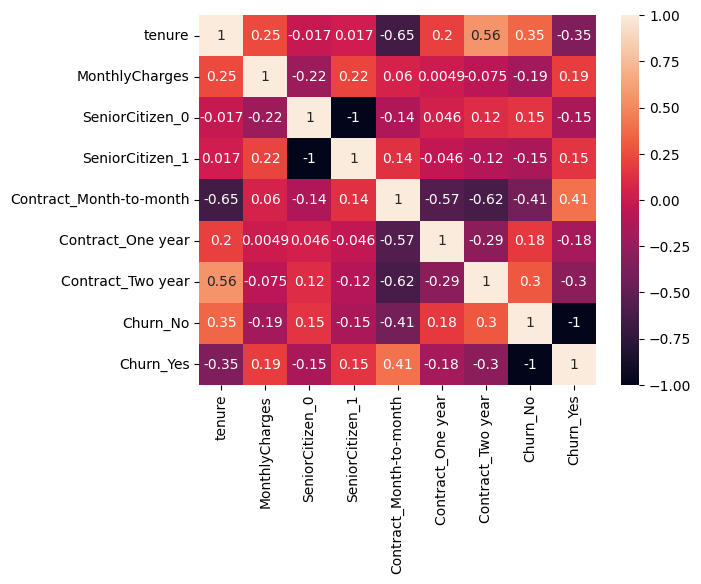

In [26]:
sns.heatmap(dummy.corr(),annot=True)
plt.show()

**DATA SPLITTING**

Here splitting the churn as output and other columns as input.

In [27]:
from sklearn.model_selection import train_test_split  #train_test_split function from the sklearn.model_selection module
from sklearn.preprocessing import LabelEncoder  #LabelEncoder class from the sklearn.preprocessing module

In [28]:
target = df['Churn'] #Extract the target variable

In [29]:
features = df.drop('Churn', axis=1) #dropping only column churn for splitting it as output.

In [30]:
label_encoder = LabelEncoder()
encoded_features = features.apply(label_encoder.fit_transform)

In [31]:
#x_train and y_train are training data , x_test and y_test are the testng data

X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.2, random_state=42, stratify=target)

In [32]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3738,3494,1,0,0,0,35,0,1,0,0,0,2,0,2,2,0,0,2,360,1201
3151,5668,1,0,1,1,15,1,0,1,2,0,0,0,0,0,0,0,3,809,288
4860,5206,1,0,1,1,13,0,1,0,2,2,0,2,0,0,2,0,3,252,4847
3867,3474,0,0,1,0,26,1,0,0,0,2,2,0,2,2,2,1,1,777,1505
3810,2012,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,2,296,3743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,4473,0,0,1,0,71,1,2,1,0,2,2,2,2,2,2,0,2,1455,5872
6227,1963,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,326,6019
4673,4543,0,1,0,0,25,1,2,1,2,2,0,0,2,2,0,1,3,1332,2316
2710,2514,0,0,1,0,24,1,0,2,1,1,1,1,1,1,1,0,1,37,4072


In [33]:
y_train

3738     No
3151     No
4860     No
3867     No
3810     No
       ... 
6303     No
6227    Yes
4673    Yes
2710     No
5639     No
Name: Churn, Length: 5634, dtype: object

In [34]:
X_train.shape #dimensions of your training feature matrix X_train.

(5634, 20)

In [35]:
y_train.shape #dimensions of your training feature matrix y_train.

(5634,)

In [36]:
X_test.shape #dimensions of your training feature matrix X_test.

(1409, 20)

In [37]:
y_test.shape #dimensions of your training feature matrix y_test.

(1409,)

**DATA MODELLING**

In [38]:
from sklearn.linear_model import LogisticRegression


In [39]:
#logistics Regression Algorithm

lreg=LogisticRegression(random_state=42)
lreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [40]:
#make prediction on test dataset

Y_predict=lreg.predict(X_test)
Y_predict

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [41]:
#make prediction on train dataset

Y_predict_lreg=lreg.predict(X_train)
Y_predict_lreg


array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

**MODEL EVALUATION**


Here, have used accuracy_score_matrix, confusion_matrix and classification_report for evalutaion.

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  #sklearn.metrics module in scikit-learn


**Evaluating using accuracy_score_matrix**

In [43]:

#evaluate test data

accuracy_lreg= accuracy_score(y_test,Y_predict)
accuracy_lreg


0.7856635911994322

In [44]:
#evaluate train data

accuracy_lreg1= accuracy_score(y_train,Y_predict_lreg)
accuracy_lreg1

0.8003194888178914

In [45]:
#finding accuracy of train and test datas

print(accuracy_lreg * 100)
print(accuracy_lreg1 * 100)


78.56635911994321
80.03194888178913


**Evaluating using confusion_matrix**

In [46]:
#evaluate test data
confusion_matrix(y_test,Y_predict)

array([[907, 128],
       [174, 200]])

In [47]:
#evaluate train data

confusion_matrix(y_train,Y_predict_lreg)

array([[3673,  466],
       [ 659,  836]])

**Evaluating using classification_report**

In [48]:
##evaluate train data

cr= classification_report(y_train,Y_predict_lreg)
print(cr)

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      4139
         Yes       0.64      0.56      0.60      1495

    accuracy                           0.80      5634
   macro avg       0.74      0.72      0.73      5634
weighted avg       0.79      0.80      0.80      5634



In [49]:
#evaluate test data

cr1= classification_report(y_test,Y_predict)
print(cr1)

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1035
         Yes       0.61      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.79      0.78      1409

